## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import re
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df = pd.read_csv('../data/raw/train_1.csv')
exog_txt = open('../data/raw/exog.txt').read()

In [3]:
#Information about the adease data
print(f'Rows:{df.shape[0]}\nColumns:{df.shape[1]}')
print('-'*50)
print(f'Dataframe information:\n{df.info()}')


Rows:145063
Columns:551
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
Dataframe information:
None


In [4]:
# Df view
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


Each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

In [5]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [6]:
fig = px.line(df.isna().sum())
fig.update_layout(title='Null values trend by date', xaxis_title = 'Date', yaxis_title = 'Null Count')
fig.show()

So many nan values!

Almost all the columns have nan values reason being:
1. Articles not published before the date with null value

In [7]:
# Null value mitigation
# Remove all such rows and columns with all nan values

print(f'Initial df shape: {df.shape}')
df.dropna(how='all', inplace=True)
print(f'Pass 1 df shape: {df.shape}')
df.dropna(thresh=400, inplace=True)
print(f'Pass 1 df shape: {df.shape}')
df.fillna(0, inplace=True)

Initial df shape: (145063, 551)
Pass 1 df shape: (145063, 551)
Pass 1 df shape: (129027, 551)


In [8]:
df.tail(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
144982,Área_metropolitana_de_Ciudad_del_Este_es.wikip...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0
144983,Sing_(película)_es.wikipedia.org_all-access_sp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,32.0,21.0,43.0,52.0,50.0,120.0,170.0,54.0,49.0
144984,Anónima_(serie_de_televisión)_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,5.0,5.0,3.0,5.0,8.0,0.0,5.0,3.0
144985,Márama_es.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,36.0,18.0,39.0,30.0,6.0,13.0,35.0,50.0,10.0
144986,Merlí_(serie_de_TV3)_es.wikipedia.org_all-acce...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,8.0,11.0,10.0,18.0,6.0,18.0,16.0,6.0,10.0


page name format = **SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN**\
Contains: Name, Language, AccessType, AccessOrigin

In [9]:
df['Page'].iloc[1]

'2PM_zh.wikipedia.org_all-access_spider'

### Extraction Logic

- split with underscore
- elements with wikipedia.org will contain language
- everything prior to that is name
- we get access type after wikipedia
- access origin after access type

Use regex or string manipulation


In [10]:
pattern = re.compile(
    r"^(?P<name>.+?)_"
    r"(?P<lang>[a-z-]+)\.wikipedia\.org_"
    r"(?P<access_type>[^_]+)_"
    r"(?P<access_origin>[^_]+)$"
)

df[['Name', 'Language', 'AccessType', 'AccessOrigin']] = df["Page"].str.extract(pattern)

In [11]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Name,Language,AccessType,AccessOrigin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,zh,all-access,spider


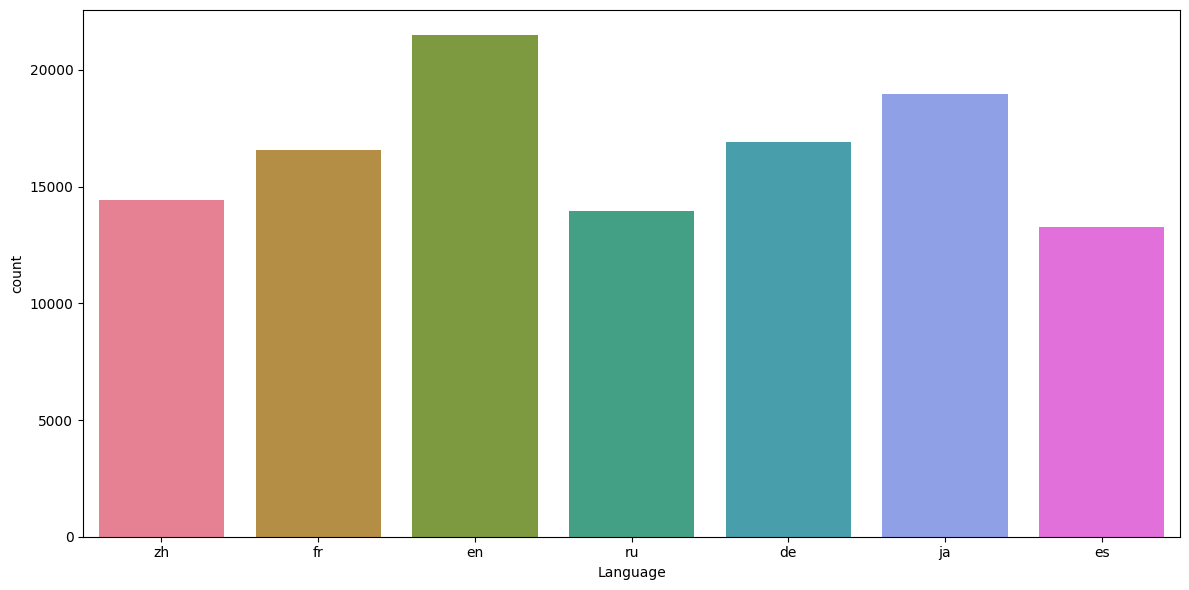

In [13]:
accesstype_count = df['AccessType'].value_counts().to_dict()
type = list(accesstype_count.keys())
count2 = list(accesstype_count.values())

accessorigin_count = df['AccessOrigin'].value_counts().to_dict()
origin = list(accessorigin_count.keys())
count3 = list(accessorigin_count.values())


plt.figure(figsize=(12, 6)) 
ax=sns.countplot(df, x='Language',
            palette="husl")
plt.tight_layout()
plt.show()


fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=['AccessType count distribution', 'AccessOrigin count distribution'])

fig.add_trace(go.Pie(values=count2, labels=type, hole=.3,
                    text=[str(v) for v in count2],
                    textinfo="label+percent+text",        
                    textposition="outside",           
                    insidetextorientation="radial",  
                    showlegend=False ),
              row=1,
              col=1)

fig.add_trace(go.Pie(values=count3, labels=origin, hole=.3,
                    text=[str(v) for v in count3],
                    textinfo="label+percent+text",           
                    textposition="inside",           
                    insidetextorientation="radial",  
                    showlegend=False),
              row=1,
              col=2)



### Plotting the timeseries
1. Grouped by Languages
2. Grouped by access type

In [19]:
df['Language'].value_counts()

Language
en    21492
ja    18981
de    16915
fr    16577
zh    14425
ru    13969
es    13278
Name: count, dtype: int64

In [52]:
language_df = df.drop(columns=['AccessType','AccessOrigin','Name','Page'])
language_df = language_df.groupby('Language').mean().transpose()
language_df.columns.name = None
language_df.index.name = 'Date'
language_df.head()

,de,en,es,fr,ja,ru,zh
Date,,,,,,,
2015-07-01,783.948744,3941.539643,1150.304489,510.261085,624.805016,677.470828,287.340659
2015-07-02,773.271239,3928.803136,1099.275870,513.537854,717.489384,689.192498,287.767140
2015-07-03,742.182383,3730.086404,1010.977482,493.793388,647.996628,638.780586,285.858163
2015-07-04,681.071771,3883.418295,949.222398,527.819811,814.146568,600.830911,288.622808
2015-07-05,791.742536,4010.695701,1032.293945,518.211860,781.063063,639.865488,307.882010


In [71]:
language_codes = {
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "ja": "Japanese",
    "ru": "Russian",
    "zh": "Chinese"
}

fig = go.Figure()
for lang in language_df.columns:
    fig.add_trace(go.Line(x=language_df.index, 
                          y = language_df[lang],
                          name = language_codes[lang]))
    
fig.update_layout(title = 'Trend anaylysis w.r.t article language')
fig.show()


🔔 This trend plot shows that english language have the most number of views so let's go with it first then we can simultaneously move our finalized model for these other languages as well  

In [75]:
fig = px.line(language_df['en'])
fig.update_layout(title = f'Trend for {language_codes['en']} articles', yaxis_title=language_codes['en'])

In [76]:
# save this dataframe as csv 
language_df.to_csv('../data/processed/language_based_count.csv')